In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [31]:
np.set_printoptions(precision=3)

### Binary classification problem

Toy data. Suppose that we have classifier f(x) to predict birds or not-birds

In [32]:
df = pd.DataFrame({"Animal":["Cat","Cat","Cat","Cat","Cat","Cat",
                             "Bird","Bird","Bird","Bird","Bird","Bird",
                             "Fish","Fish","Fish","Fish","Fish","Fish"]})

In [33]:
df

,Animal
0,Cat
1,Cat
2,Cat
3,Cat
4,Cat
5,Cat
6,Bird
7,Bird
8,Bird
9,Bird


In [34]:
labels = {name: i for i, name in enumerate(df.Animal.unique())}

In [35]:
labels

{'Cat': 0, 'Bird': 1, 'Fish': 2}

In [36]:
df['Animal'] = df.Animal.apply(lambda x: labels[x])

In [37]:
df

,Animal
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,1
9,1


In [38]:
y_true = df.Animal.values

#### Prediction types

Suppose, we have features X, which describes animal. X can be picture, or {weight, height} etc.

True positive
$$f(X_{bird})\to bird$$

False positive
$$f(X_{cat})\to bird$$

False negative
$$f(X_{bird})\to \overline{bird}$$

True negative
$$f(X_{fish})\to \overline{bird}$$

<table>
<tbody>
  <tr>
    <td></td>
    <td colspan="2">True labels</td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td rowspan="2"><br>Predicted labels</td>
    <td>TP</td>
    <td>FP</td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>FN</td>
    <td>TN</td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
</tbody>
</table>

#### Accuracy

Here we have answers of f classifier

In [39]:
y_pred = np.array([0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0])

In [40]:
print(f"y_true:\n{y_true}\ny_predict:\n{y_pred}")

y_true:
[0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2]
y_predict:
[0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0]


In [41]:
N = len(y_pred)

$$Accuracy = \sum_{i=1}^N[f(x_{i})=y_{i}] = \frac{Tp + Tn}{Tp+Tn+Fp+Fn}$$

In [42]:
# We have to encode y_true to binary represenataion
not_birds = np.where(y_true!=1)
y_true[not_birds] = 0

In [43]:
print(f"y_true:\n{y_true}\ny_predict:\n{y_pred}")

y_true:
[0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
y_predict:
[0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0]


In [44]:
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy = {acc :.3f}")

Accuracy = 0.889


<AxesSubplot:>

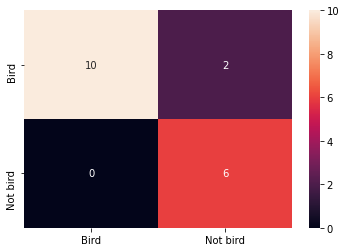

In [45]:
M = confusion_matrix(y_true, y_pred)
sns.heatmap(M, annot=True, xticklabels=['Bird', 'Not bird'], yticklabels=['Bird', 'Not bird'])

#### Imbalanced classes problem

In [46]:
y_true = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1])

In [47]:
y_pred = np.array([0,0,0,0,0,0,0,0,0,0,1,0,0])

In [48]:
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy = {acc :.3f}")

Accuracy = 0.846


<AxesSubplot:>

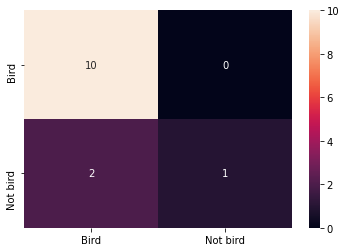

In [49]:
M = confusion_matrix(y_true, y_pred)
sns.heatmap(M, annot=True, xticklabels=['Bird', 'Not bird'], yticklabels=['Bird', 'Not bird'])

Accuracy 84 is not so bad, but obviously not informative. We recognized only one bird from 13 examples

#### Precision & recall

$$Precision = \frac{Tp}{Tp+Fp}$$

$$Recall = \frac{Tp}{Tp+Fn}$$

In [50]:
# Once again, first example
y_true = df.Animal.values
y_pred = np.array([0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0])
print(f"y_true:\n{y_true}\ny_predict:\n{y_pred}")

y_true:
[0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
y_predict:
[0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0]


In [51]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)

In [52]:
print(f"Accuracy = {acc :.3f}")
print(f"Precision = {prec :.3f}")
print(f"Recall = {prec :.3f}")

Accuracy = 0.889
Precision = 0.750
Recall = 0.750


In [53]:
# And second one
y_true = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1])
y_pred = np.array([0,0,0,0,0,0,0,0,0,0,1,0,0])

In [54]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred, average='binary')

In [55]:
print(f"Accuracy = {acc :.3f}")
print(f"Precision = {prec :.3f}")
print(f"Recall = {rec :.3f}")

Accuracy = 0.846
Precision = 1.000
Recall = 0.333


From sklearn documentation:
"Only report results for the class specified by pos_label"  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

We have only three positive sample in second example, thus we have following:

$$Precision = \frac{Tp}{Tp+Fp} = \frac{1}{1+0}=1$$
$$Recall = \frac{Tp}{Tp+Fn} = \frac{1}{1+2}=0.333$$

Precision equals one => model never classify non bird as bird

In [56]:
# Another one example
y_true = np.array([1,1,1,1,1,1,1,1,1,1,0,0,0])
y_pred = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1])

In [57]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred, average='binary')

In [58]:
print(f"Accuracy = {acc :.3f}")
print(f"Precision = {prec :.3f}")
print(f"Recall = {rec :.3f}")

Accuracy = 0.769
Precision = 0.769
Recall = 1.000


Recall equals one => all birds were classified as birds (but other animals could be classified as birds too)